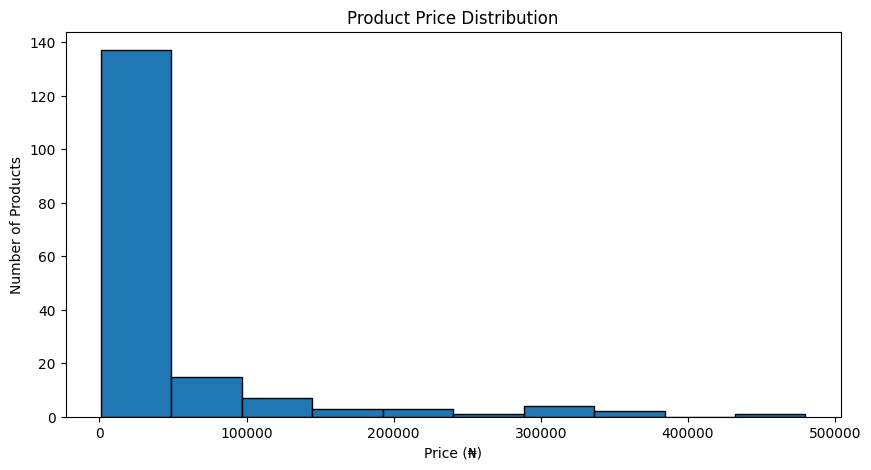

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the scraped data
df = pd.read_csv("/Users/samenergy/Documents/Projects/WebScraping/products.csv")

# Function to clean the price column
def clean_price(price):
    # Remove the currency symbol and any spaces
    price = price.replace("₦", "").replace(",", "").strip()
    
    # Handle price ranges by taking the first value
    if " - " in price:
        price = price.split(" - ")[0] 
    
    # Convert to float
    try:
        return float(price)
    except ValueError:
        return None  # Handle any unexpected formats gracefully

# Apply the cleaning function
df["Price"] = df["Price"].astype(str).apply(clean_price)

# Drop any rows where price could not be converted
df = df.dropna(subset=["Price"])

# Plot price distribution
plt.figure(figsize=(10, 5))
plt.hist(df["Price"], bins=10, edgecolor="black")
plt.xlabel("Price (₦)")
plt.ylabel("Number of Products")
plt.title("Product Price Distribution")
plt.show()
